# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **In this project we will be analyzing data associated with no show appointments related to patients. This dataset collects information from more than 100k medical appointments in Brazil. The characteristics of the dataset are:** 
- **PatientID:** Identification number of a patient.
- **AppointmentID:** Identification number of each appointment.
- **Gender**: Patient gender weather male or female.
- **ScheduledDay**: The day someone called or registered the appointment.
- **AppointmentDay**: The day of the actual appointment.
- **Age**: Patient age.
- **Neighbourhood**: Where the appointment takes place.
- **Scholarship**: True or false values. It determines whether the patient has a social welfare program scholarship given by the government of Brazil for poor families or not. 1=yes,0=no.
- **Hipertension**: True or false values. Determines whether the patient has hipertension or not. 1=yes,0=no.
- **Diabetes**: True or false values. Determines whether the patient has diabetes or not. 1=yes,0=no.
- **Alcoholism**: True or false values. Determines whether the patient is considered as an alcoholic or non-alcoholic. 1=yes,0=no.
- **Handcap**: True or false values. Determines whether the patient is considered as a handicapped or not. 1=yes,0=no.
- **SMS_received**: True or false values. Determines whether the patient has received an SMS or not. 1=yes,0=no.
- **No-show**: True or false values. Determines whether the patient has attended the appointment or not. Yes= he did not attend, No= he did attend.

> **Main questions are:**
- Who is considered to be not showing on their appointments the most? Males or Females? That should indicate who cares about their health the most, males or females.
- Based on dataset given, count those who attended their appointments with those who did not. regardless of any other feature.
- If patient did not receive an SMS for his appointment, is he/she going miss the appointment?
- Which neighborhoods do attend appointments the most?
- If patient does not have a scholarship, is he/she probably going to miss the appointment?
- Is alcoholism a prominent factor in patient's absences? Are the absences frequent?

In [1]:
# importing needed libariries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> **In this section i will load my dataset and start exploring the main characteristics of each column.** 

In [2]:
#load the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#check the total number of rows and columns
df.shape

(110527, 14)

In [4]:
#get an overview about main statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#to check missing or null values.
#based on information given below, there are no null values in the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
 - Checking for duplicated data for each column if it should be changed or not. **null values and datatypes are previously checked above in info()**
 - Fix datatypes of: 
         - ScheduleDay: Instead of string(object) it should be day-time. 
         - AppointmentDay: Instead of string(object) it should be day-time. 
 - Rename columns to be more clear:
         - PatientID
         - AppointmentID
         - ScheduledDay
         - AppointmentDay.
 - Lowercase all columns.
 - Dropping unneeded columns to clean up the data. Remove data that we do not need to perform data analysis. Such as patient id, appointment id. The reason is they are unique identifiers.
 - Make sure only statistical columns are left.
 - Removing outliers if there are any. and replace age outliers with mean value.

In [6]:
# Checking for duplicated data
df.duplicated().sum()

0

In [7]:
#checking for null values
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# Fix datatypes
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay']) 
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay']) 

In [9]:
#check datatypes
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [10]:
# Rename columns
df.rename(columns={'No-show':'No_show','ScheduledDay':'Scheduled_day','AppointmentDay':'Appointment_day','AppointmentID':'Appointment_ID','PatientId':'Patient_ID'}, inplace=True)
#check the name if has been renamed
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#Lowercase all columns
df.columns = map(str.lower, df.columns)
#check if columns have been lowercased
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#drop unneeded columns
df.drop(['patient_id', 'appointment_id','scheduled_day','appointment_day'],axis=1,inplace=True)
#check if columns have been dropped
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#check for outliers
print(df['gender'].unique())
print(df['age'].unique())
print(df['neighbourhood'].unique())
print(df['scholarship'].unique())
print(df['hipertension'].unique())
print(df['diabetes'].unique())
print(df['alcoholism'].unique())
print(df['handcap'].unique())
print(df['sms_received'].unique())
print(df['no_show'].unique())

['F' 'M']
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDEN

In [14]:
# we found an outliers in each of "age" and "handcap" columns. 
# Age should not be less than or equal 0. So we will replace the outliers with the mean value.
# replacing the outlier which are 0 and -1 as shown above for the age with NaN using fillna function value then replace NaN with the mean. 
mean = df.loc[df['age']>0, 'age'].mean()
df.loc[df.age <= 0, 'age'] = np.nan
df.fillna(mean,inplace=True)

In [15]:
#convert to int after adding mean value and round the mean with nearest number
df['age']=df['age'].astype(int)

In [16]:
#checking for outliers if they have been replaced with the mean value
print(df['age'].unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   3   1  69  68  60  67  36  10  35  20  26
  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75  73
  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90  94
  86  91  98  92  96  93  95  97 102 115 100  99]


In [17]:
#For handcap column it shows in the dataset description that handcap column has only 2 values either 0 or 1.
#Based on data given above we have five unique values 0,1,2,3,4
#view rows having 2,3 or 4 values
query = df.query('handcap == 2 or handcap == 3 or handcap == 4') 
query

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
946,M,94,BELA VISTA,0,1,1,0,2,1,No
1665,M,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,M,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,M,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,F,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...
108376,F,44,ROMÃO,0,1,1,0,2,1,No
109484,M,64,DA PENHA,0,1,1,0,2,0,No
109733,F,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,M,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [18]:
#drop rows with handcap values 2,3 or 4 by index
index2 = df[ df['handcap'] == 2].index
index3 = df[ df['handcap'] == 3].index
index4 = df[ df['handcap'] == 4].index

df.drop(index2, inplace=True)
df.drop(index3, inplace=True)
df.drop(index4, inplace=True)

In [19]:
#check the query again it should return no values
df.query('handcap == 2 or handcap == 3 or handcap == 4')

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [20]:
#total rows after removing outliers (total before removing = 110527 - 199"rows with handcap value=2,3,4" = 110328)
# statement should return trun if rows length equals to 110328
len(df.index) == 110328

True

<a id='eda'></a>
## Exploratory Data Analysis

In this section we will discover the data based on statistical data in addition to visualization for each question. 

### Who is considered to be not showing on their appointments the most? Males or Females? That should indicate who cares about their health the most, males or females.

gender  no_show
F       No         79.690789
        Yes        20.309211
M       No         80.024354
        Yes        19.975646
Name: no_show, dtype: float64


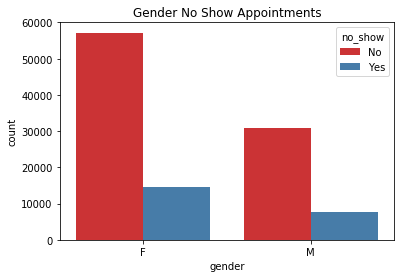

In [21]:
# calculating the ratio for each gender based on value of No_show. 
print(df.groupby('gender')['no_show'].value_counts(normalize=True)*100)

#draw bar chart based on each gender. This histogram should view result of no-show appointments based on gender
# PLEASE NOTE THAT NO=patient did attend appointment. 
# Countplot function by seaborn gives you the ability to draw the histogram based on column value
sns.countplot(x="gender", hue='no_show', data=df, palette="Set1").set_title("Gender No Show Appointments");

#####  <font color='blue'> As shown above, based on the data given we can say that Males are coisdered more attending their appointments than Females in terms of data ratio. Even though the difference is conisdered small. </font>

### Q2:  If patient did not receive an SMS for his appointment, is he/she going miss the appointment?

sms_received  no_show
0             No         83.305516
              Yes        16.694484
1             No         72.414280
              Yes        27.585720
Name: no_show, dtype: float64


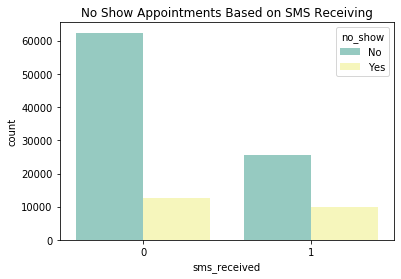

In [22]:
# calculating the ratio of SMS's values based on value of No_show. 
print(df.groupby('sms_received')['no_show'].value_counts(normalize=True)*100)

#draw bar chart based on sms_received where 0=no, 1=Yes. This histogram should view result of no-show appointments based on gender
# PLEASE NOTE THAT 1=Yes received. 
# Countplot function by seaborn gives you the ability to draw the histogram based on column value
sns.countplot(x="sms_received", hue='no_show', data=df, palette="Set3").set_title("No Show Appointments Based on SMS Receiving");

#####  <font color='blue'> SMS is considered as a factor to make the patients attending their appointments depending on data ratio of SMS received by patients compared to not receiving an SMS.</font>

### Q3: - Based on dataset given, count those who attended their appointments with those who did not. regardless of any other feature.

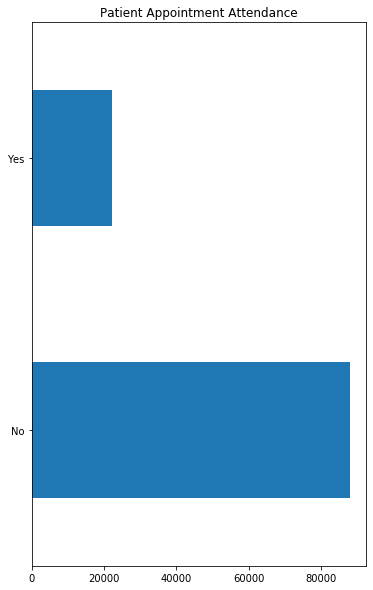

In [23]:
#Histogram of calculate values of attended/not attended patients for their appointments.
# No= he/she attended.
df['no_show'].value_counts().plot(kind='barh', figsize=(6,10), title='Patient Appointment Attendance');

#####  <font color='blue'> Chart above shows that majority of patient did attend their appointments. </font>

### Q4: Which neighborhoods do attend appointments the most? 

In [24]:
# calculating the ratio of neighbourhood's values based on value of No_show. 
print(df.groupby('neighbourhood')['no_show'].value_counts(normalize=True)*100)
# no diagram needed here because the highest percentage of NO value in each neighbourhood is the answer.

neighbourhood    no_show
AEROPORTO        No         87.500000
                 Yes        12.500000
ANDORINHAS       No         76.940133
                 Yes        23.059867
ANTÔNIO HONÓRIO  No         81.549815
                              ...    
TABUAZEIRO       Yes        18.324272
UNIVERSITÁRIO    No         78.947368
                 Yes        21.052632
VILA RUBIM       No         83.353011
                 Yes        16.646989
Name: no_show, Length: 160, dtype: float64


#####  <font color='blue'> Based on data ratio for each neighbourhood, we can say that **AEROPORTO** neighbourhood is considered the most neighbourhood with attended patients. </font>

### Q5: If patient does not have a scholarship, is he/she probably going to miss the appointment?

scholarship  no_show
0            No         80.197015
             Yes        19.802985
1            No         76.233515
             Yes        23.766485
Name: no_show, dtype: float64


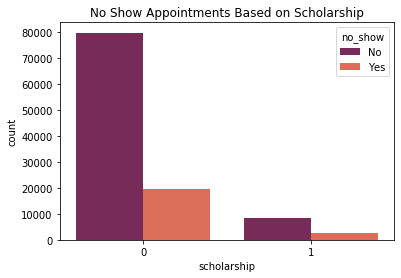

In [25]:
# calculating the ratio of scholarship's values based on value of No_show. 
print(df.groupby('scholarship')['no_show'].value_counts(normalize=True)*100)

# draw bar chart to view the details 
# 1= patient have scholarship. No=patient attended the appointment.
sns.countplot(x="scholarship", hue='no_show', data=df, palette="rocket").set_title("No Show Appointments Based on Scholarship");

#####  <font color='blue'> The answer is no. Since 80% of patients who do not have scholarship did attend their appointments based on data and diagram shown above. </font>

### Q6: Is alcoholism a prominent factor in patient's absences? Are the absences frequent?

alcoholism  no_show
0           No         79.805751
            Yes        20.194249
1           No         79.862768
            Yes        20.137232
Name: no_show, dtype: float64


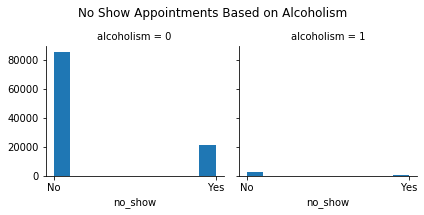

In [26]:
# calculating the ratio of alcoholism's values based on no_show values. 
# 1=considered as alcoholic. No=patient attended.
print(df.groupby('alcoholism')['no_show'].value_counts(normalize=True)*100)

#2d visualization histogram of the results
grid = sns.FacetGrid(data=df,col="alcoholism", margin_titles=True)
grid.map(plt.hist, "no_show")
plt.subplots_adjust(top=0.8)
grid.fig.suptitle('No Show Appointments Based on Alcoholism');

#####  <font color='blue'> The answer is no. Depending on data ratio of alcoholic/non alcoholic patients, we can see above they are have equal values in terms of ratio. </font>

<a id='conclusions'></a>
## Conclusions
This section explains answers for each question listed in Exploratory Data Analysis section. 

### There are some limitations to be explained as well, they are:
- Based on the dataset given for this project, i think it has enough features to determine weather the patient will attend his/her appointment or not. Perhaps, if we want to answer more questions regarding inpatient chronic diseases, we need to add more features related to chronic disease such as type of chronic disease.
- In term of observations(rows), in my opinion they are enough depending on number of hospitals listed on the dataset. Perhaps, if we want to include all country hospitals, we must add more rows to make logical visualizations.
- Visualization are restricted because of the data values. Useful data are considered boolean either True or fals, Yes or No, Male or Female. I could not create linear visualization for example. 

### Q1: Who are considered to be not showing on their appointments the most? Males or Females? That should indicate who cares about their health the most, males or females.

- But, statistically speaking. And based on the ratio above of attending the appointment or not based on each gender, We can say That: **Please Note: No= Patient attended**
- They both are almost equal depending on the ratio. But males compared to their total numbers are more caring about their health. 80% of males attended their appointments.
- On the otherhand, 79.6% of females attended their appointments. 
- No big difference between them. 
- **Answer**: They both almost care about their health equally. Males are more by slight difference as shown above.



### Q2:  If patient did not receive an SMS for his appointment, is he/she going miss the appointment?

- As we can see above, we can say that if patient received an SMS, he/she will attend their appointment.
- **Please Note: No= Patient attended**
- Percentage of attended appointments with SMS is higher than without SMS received. 
- **Answer**: If SMS received by patient, he/she will probably attend their appointment



### Q3: - Based on dataset given, count those who attended their appointments with those who did not. regardless of any other feature.

- based on the histogram shown above, we can say clearly that number of patients who attended their appointments is clearly higher. 



### Q4: Which neighborhoods do attend appointments the most? and which the least?

- as shown above, the neighbourhood "**AEROPORTO**" is considered with the most appointments attended.



### Q5: If patient does not have a scholarship, is he/she probably going to miss the appointment?

- As shown in graph and calculated average above, 80% of people who don't have scholarship attended their appointments. and 76% of people who do have scholarship attended their appointments. The answer is No.


### Q6: Is alcoholism a prominent factor in patient's absences? Are the absences frequent?
- As shown in graph above, Alchoholism is not considered as a prominent factor in patient's absence. That because, 79.8% of non alcoholic patients attended their appointments. In addition, 79.8% also as non alcoholic patients attended their appointments.